In [53]:
import Miscellaneous as misc
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Get the SPX and VVIX data

In [93]:
SPX = yf.download("^GSPC", period='5y')
VVIX = yf.download("^VVIX", period='5y')
VVIX.index = pd.to_datetime(VVIX.index).to_period('B')
SPX.index = pd.to_datetime(SPX.index).to_period('B')
VVIX.dropna(inplace=True)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


### Bollinger Bands

In [96]:
def bollinger_bands(timeSeries, window: int = 20):
    
    movingAverage = timeSeries.rolling(window).mean()
    standardDev = timeSeries.expanding(window).std()
    
    upperBand = movingAverage + 1.96*standardDev
    lowerBand = movingAverage - 1.96*standardDev

    bollinger = pd.concat([movingAverage, lowerBand, upperBand], axis=1, join='inner')
    bollinger.columns = ['Moving Average', 'Lower Band', 'Upper Band']
    bollinger.dropna(inplace=True)
    
    return bollinger

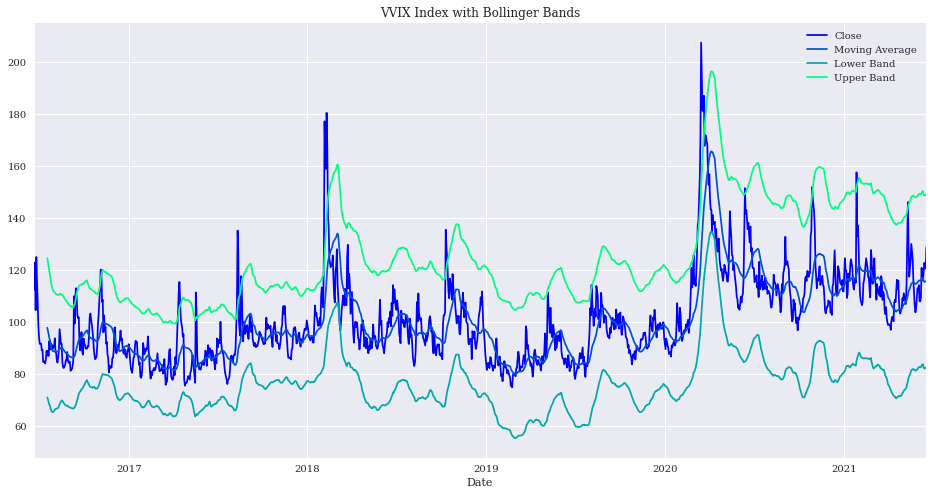

In [99]:
BB = bollinger_bands(VVIX.Close)

data = pd.concat([VVIX.Close, BB], axis=1)

data.plot(figsize=(16,8), cmap='winter', title='VVIX Index with Bollinger Bands');

### Regime Shifts

In [100]:
regimeShifts = data.index[data.Close > data['Upper Band']]

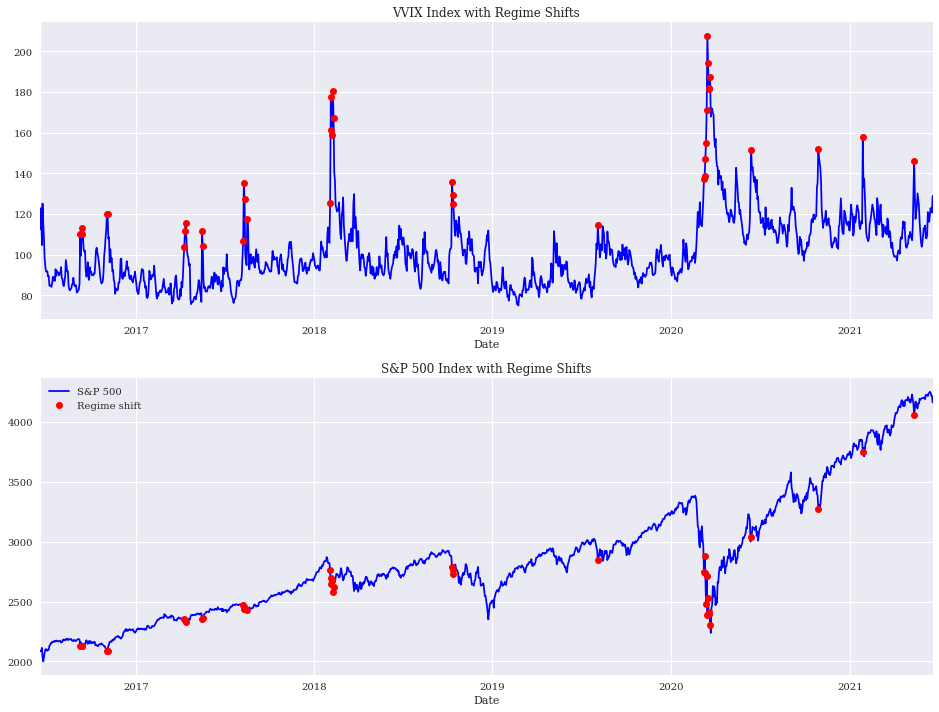

In [110]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 12))

data.Close.plot(ax=ax[0], label='VVIX', title='VVIX Index with Regime Shifts', cmap='winter')
data.Close[regimeShifts].plot(ax=ax[0], marker='o', ls='', color='red', label='Regime shift')

SPX.Close.plot(ax=ax[1], label='S&P 500', title='S&P 500 Index with Regime Shifts', cmap='winter')
SPX.Close[regimeShifts].plot(ax=ax[1], marker='o', ls='', color='red', label='Regime shift')

plt.legend()
plt.show()